In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
with open("allData.pkl","rb") as f:
    d=pickle.load(f)

In [3]:
d.keys()

dict_keys(['Resources', 'TomQuality', 'CropParameters', 'LabAnalysis', 'Production', 'GrodanSens', 'GreenhouseClimate'])

In [4]:
resources=d['Resources']

In [5]:
resources.shape

(996, 7)

In [6]:
resources.dtypes

%Time          int64
Heat_cons    float64
ElecHigh     float64
ElecLow      float64
CO2_cons     float64
Irr          float64
Drain        float64
dtype: object

In [7]:
resources.nunique()

%Time        166
Heat_cons    860
ElecHigh     193
ElecLow      153
CO2_cons     910
Irr          203
Drain        329
dtype: int64

In [8]:
#View the data
resources.head()

,%Time,Heat_cons,ElecHigh,ElecLow,CO2_cons,Irr,Drain
0,43815,2.71,1.1,0.0,0.007,0.00,0.0
1,43816,0.92,1.0,0.0,0.009,0.00,0.0
2,43817,0.97,1.0,0.7,0.014,0.00,0.0
3,43818,0.10,0.9,0.5,0.025,0.00,0.0
4,43819,2.24,0.8,0.5,0.017,0.76,0.0


In [9]:
resources.columns

Index(['%Time ', 'Heat_cons', 'ElecHigh', 'ElecLow', 'CO2_cons', 'Irr',
       'Drain'],
      dtype='object')

In [10]:
#Basic information
resources.info()
#Describe the data
resources.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   %Time      996 non-null    int64  
 1   Heat_cons  996 non-null    float64
 2   ElecHigh   996 non-null    float64
 3   ElecLow    996 non-null    float64
 4   CO2_cons   996 non-null    float64
 5   Irr        996 non-null    float64
 6   Drain      996 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 54.6 KB


,%Time,Heat_cons,ElecHigh,ElecLow,CO2_cons,Irr,Drain
count,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000,996.000000
mean,43897.500000,1.786728,1.013647,0.606728,0.057534,4.479747,1.639146
std,47.943277,1.162702,0.659289,0.377083,0.025882,2.947087,1.296136
min,43815.000000,0.000000,0.000000,0.000000,0.003647,0.000000,0.000000
25%,43856.000000,0.781200,0.357500,0.250250,0.039971,2.860000,0.600000
50%,43897.500000,1.516800,1.300000,0.786500,0.054870,4.160800,1.305000
75%,43939.000000,2.622075,1.500000,0.900000,0.073042,5.980575,2.480000
max,43980.000000,5.960000,2.216500,1.144000,0.160000,60.201327,6.110000


In [11]:
#Find the duplicates
resources.duplicated().sum()

0

In [12]:
#Find NaN values
resources.isna().sum()

%Time        0
Heat_cons    0
ElecHigh     0
ElecLow      0
CO2_cons     0
Irr          0
Drain        0
dtype: int64

In [13]:
#renaming
resources.rename(columns={'%Time ': 'Time'}, inplace=True)
resources.head()

,Time,Heat_cons,ElecHigh,ElecLow,CO2_cons,Irr,Drain
0,43815,2.71,1.1,0.0,0.007,0.00,0.0
1,43816,0.92,1.0,0.0,0.009,0.00,0.0
2,43817,0.97,1.0,0.7,0.014,0.00,0.0
3,43818,0.10,0.9,0.5,0.025,0.00,0.0
4,43819,2.24,0.8,0.5,0.017,0.76,0.0


In [14]:
#changing time format
resources['Time'] = pd.to_datetime(resources['Time'], unit='D', origin='1899-12-30')

In [15]:
resources.head()

,Time,Heat_cons,ElecHigh,ElecLow,CO2_cons,Irr,Drain
0,2019-12-16,2.71,1.1,0.0,0.007,0.00,0.0
1,2019-12-17,0.92,1.0,0.0,0.009,0.00,0.0
2,2019-12-18,0.97,1.0,0.7,0.014,0.00,0.0
3,2019-12-19,0.10,0.9,0.5,0.025,0.00,0.0
4,2019-12-20,2.24,0.8,0.5,0.017,0.76,0.0


<ipython-input-16-da797fe72193>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(resources.corr(), annot=True)


<AxesSubplot:>

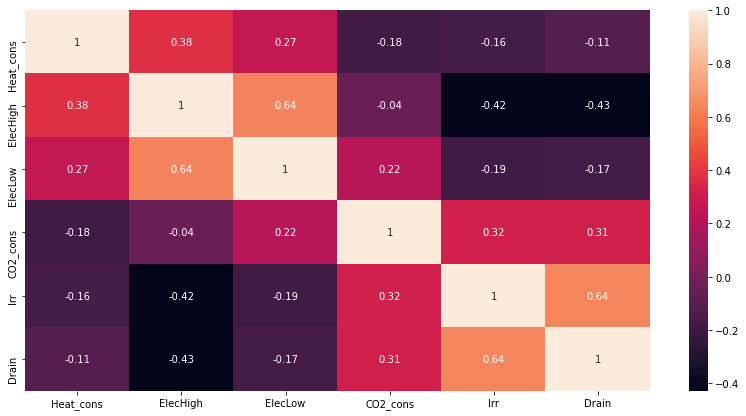

In [16]:
#correlation
plt.figure(figsize=(14,7))
sns.heatmap(resources.corr(), annot=True)

In [17]:
correlations = resources.corr()
cols = correlations
for i in cols:
    for j in cols:
         if i!=j and abs(correlations.loc[i, j])>= 0.6:
            print(f"{i} and {j} correlated with value {correlations.loc[i, j]}")

ElecHigh and ElecLow correlated with value 0.6370797917075196
ElecLow and ElecHigh correlated with value 0.6370797917075196
Irr and Drain correlated with value 0.6424283685080416
Drain and Irr correlated with value 0.6424283685080416


<ipython-input-17-28354daa4833>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = resources.corr()


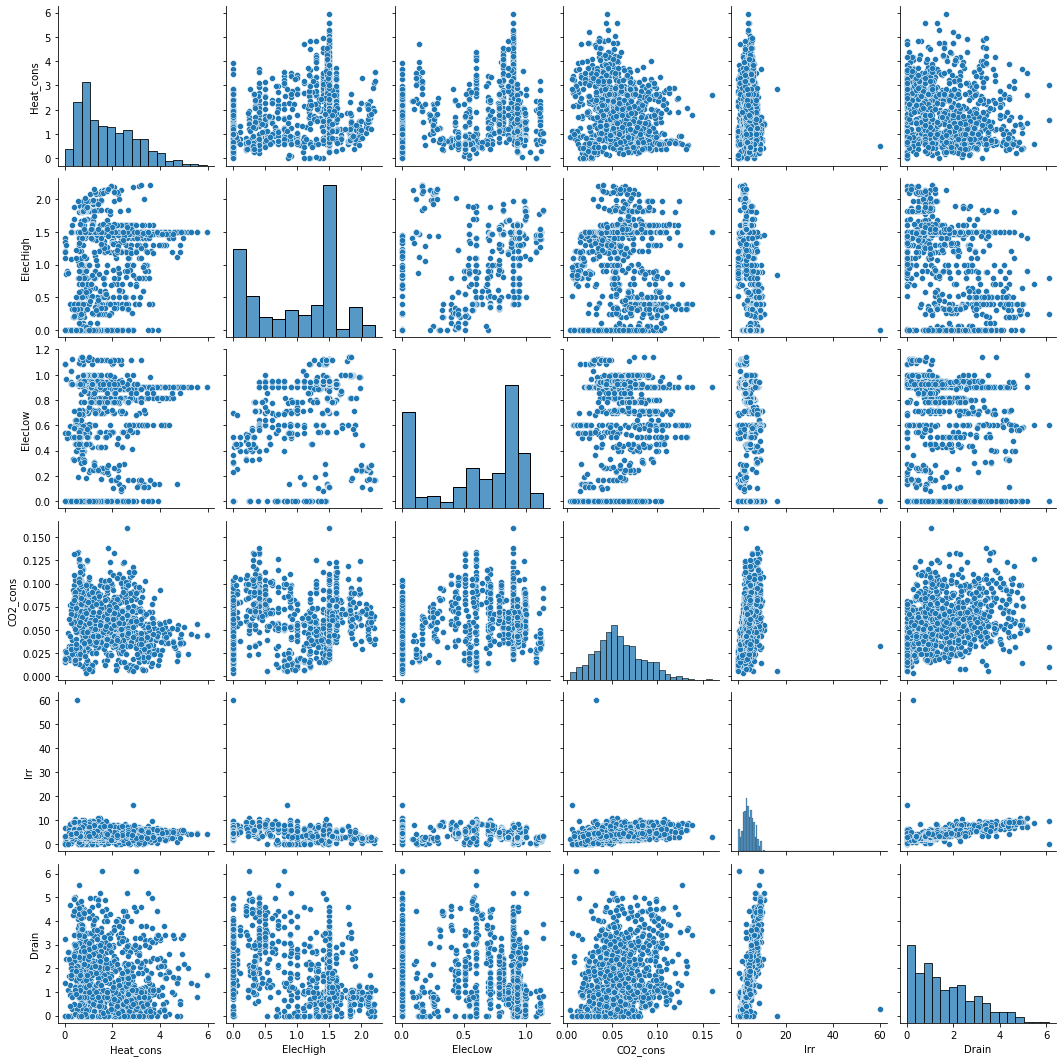

In [18]:
sns.pairplot(resources)

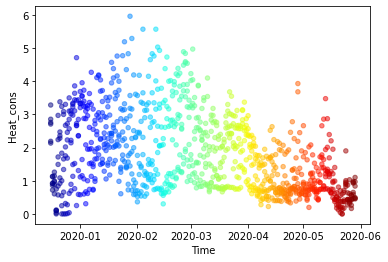

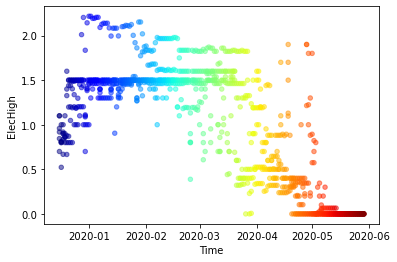

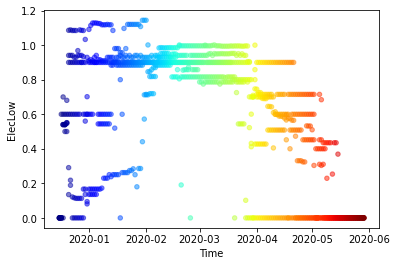

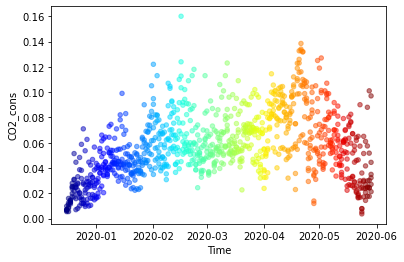

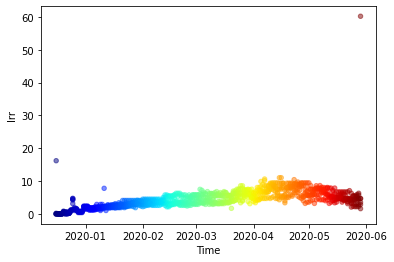

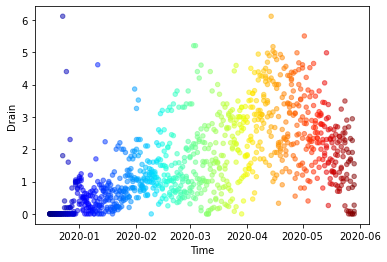

In [19]:
#scatter plot with respect to time 
columns=['Heat_cons', 'ElecHigh', 'ElecLow', 'CO2_cons', 'Irr',
       'Drain']
for i in columns:
    resources.plot(kind='scatter',x='Time', y=i, alpha=0.5, c='Time',cmap=plt.get_cmap("jet"))